# mixture density networks 


- About density estimation: http://scikit-learn.org/stable/modules/density.html


- http://tullo.ch/articles/speeding-up-isotonic-regression/

We want to model the conditional distribution as a mixture of Gaussians, where each Gaussian component parameters are dependent on the input, that is 


\begin{equation}
P(y^m \mid x^m) = \sum_{k=1}^K \pi_k(x^m) \mathcal{N} \left( y^m \mid \mu_k(x^m) , \sigma_k^2(x^m) \right)
\end{equation}


In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

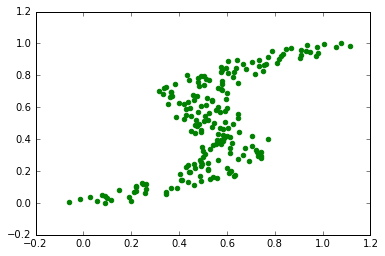

In [2]:
# generate some 1D regression data (reproducing Bishop book data, page 273). 
# Note that the P(y|x) is not a nice distribution.
# E.g. it has three modes for x ~= 0.5
N = 200
X = np.linspace(0,1,N)
Y = X + 0.3 * np.sin(2*3.1415926*X) + np.random.uniform(-0.1, 0.2, N)
X,Y = Y,X
plt.scatter(X,Y,color='g')

## About the model

Now we will present a mixture density network (MDN) with a single hidden layer. This model can be generalized using as many hidden layers as we want defined just like in a regular multilayer perceptron. The main difference between an standard MLP and a MDN is the output layer which will be specified in the following:

#### Weights

Let us assume we are training a MDN with $K$ Gaussian components and the objective is to build a density $P(t \mid x)$ where the target $t$ is a 1D variable (that is we are studying a 1D regression problem).

- First layer weights W1 defines a mapping from the input to the hidden layer.

- Second layer weights are composed by:

    - A weight matrix for the mixing coefficients $\pi_k$:  ```W_pi``` of shape ```(hidden_size, K)```
        
    - A weight matrix for the for the means of the Gaussian components $\mu_k$: ```W_mean``` of shape ```(hidden_size, K)```
    
    -  A weight matrix for the variances of the Gaussian components $\sigma_k^2$:  ```W_variance``` of shape ```(hidden_size, K)```

- Second layer biases are composed by:

    - A bias for the hidden layer: shape (hidden_size,1)
    
    - A bias for the mixing coefficients: shape (K,1)
    
    - A bias for the means of the Gaussian components: shape (K,1)
    
    - A bias for the variances of the Gaussian components: shape (K,1)


In [29]:
import mixture_density_network
from mixture_density_network import MDNRegressor

In [30]:
X = X.reshape(-1,1)
X.shape, Y.shape

((200, 1), (200,))

In [87]:
mdn =  MDNRegressor(hidden_layer_size=10,
                    n_components=3,
                    n_epochs=600)

In [88]:

mdn.fit(X,Y)

('epoch: ', 0, 'loss: ', 0.016120973496776041)


In [89]:
X.shape, Y.shape

((200, 1), (200,))

In [107]:
mdn._compute_loss(X[0:8],Y[0:8])

{'lp': 128.48108537759774}

In [105]:
# utility function for creating contour plot of the predictions
def drawContour(model):
    n = 50
    xx = np.linspace(0,1,n)
    yy = np.linspace(0,1,n)
    xm, ym = np.meshgrid(xx, yy)
    
    X = xm.reshape(xm.size)
    y =  ym.reshape(ym.size)
    
    print("X :", X.shape)
    print("y: ", y.shape)
    print(X)
    stats = model._compute_loss(X, y)
    logps = stats["lp"]
    plt.figure(figsize=(10,10))
    plt.scatter(X,Y,color='g')
    lp = stats['lp']
    plt.contour(xm, ym, np.reshape(logps, (n, n)), levels=np.linspace(lp.min(), lp.max(), 50))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('3-component Gaussian Mixture Model for P(y|x)')

In [106]:
drawContour(model=mdn)

('X :', (2500,))
('y: ', (2500,))
[ 0.          0.02040816  0.04081633 ...,  0.95918367  0.97959184  1.        ]


ValueError: shapes (2500,) and (1,10) not aligned: 2500 (dim 0) != 1 (dim 0)

In [ ]:
X.shape

In [ ]:
X.shape, Y.shape

In [ ]:
X = X.reshape(-1,1)

In [ ]:
X.shape, Y.shape

In [ ]:
X[0:3], Y[0:3]

In [ ]:
mdn._initialize_in_fit(n_features=1, n_hidden=4, n_outputs=1, n_components=5)

In [ ]:
Xbatch = X[0:3]
# activation at the hidden layer for each of the element s in the minibatch
act_h1 = np.dot(Xbatch, mdn.coefs_["W_1"]) + mdn.intercepts_["b_1"]

In [ ]:
np.dot(act_h1,mdn.coefs_['W_mean'])

In [ ]:
mdn.intercepts_['b_mean'].shape

In [ ]:
act_means = np.dot(act_h1,mdn.coefs_['W_mean']) + mdn.intercepts_['b_mean']

In [ ]:
#mdn.fit(X,Y)

In [ ]:
n_hidden = 10
a = {"b_1":  np.zeros(n_hidden, 0)}

In [ ]:
a = {"b_1":  np.zeros(100, 0)}

In [ ]:
np.zeros(100, 0)

In [ ]:
np.zeros(100,)